ESG is incresingly becoming a key term in Finance. It recalls environmental, social and governance indexes all together, accounting one's business performance. Derived KPIs took place over the last yeas, rather influencing the stock markets. Although it has garnered lots of attention lately, litle is known about the metrics calculation or its real impact on companies. This notebook was created to analyse data from World Bank and seeks to understand the factors behind ESG.

The dataset can be found in the [link](https://databank.worldbank.org/source/environment-social-and-governance-(esg)-data#).

## **Preparing the dataset**

In [ ]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set file path
url = '/content/drive/MyDrive/Colab-Notebooks/Machine-Learning/world-bank-esg.csv'

In [ ]:
# Loading dataframe
df = pd.read_csv(url)

In [ ]:
# Check whether the dataframe was correctly loaded
df.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Brazil,BRA,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,95.3,95.6,95.8,95.9,96.1,96.3,96.4,96.5,..,..
1,Brazil,BRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,99.650247,99.710902,99.7,99.8,99.7,99.8,99.7027130126953,99.4621200561523,..,..
2,Brazil,BRA,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,..,..,..,..,..,..,...,1.74979758692364,1.11264455896167,1.02883412080618,1.24905409177789,1.89875463067738,1.75977305025389,1.31416348966725,3.74676225993476,..,..
3,Brazil,BRA,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,..,..,..,..,..,..,...,0,0,0,0,0,0,0,0,..,..
4,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,..,18.7791781425054,19.2226978729717,19.6662176034381,20.1097373339044,20.5532570643708,...,28.0824920377022,28.1687313206048,28.2549706035075,28.3410663137971,28.4156284771492,28.490129502497,28.5646185634603,28.6390944636007,..,..


In [ ]:
# Check the countries contained in dataset
countries = df['Country Code'].unique()
print(countries)

['BRA' 'WLD' nan]


In [ ]:
# Creates a function to prepare the dataframe
def prepare_dataframe(df, code, set_cols=False):

    '''
    World Bank csv files are not ready for dataframe operations. The columns
    exibit a unusual label, many instances are filled with an odd ".." record,
    and values are represented as strings.
    Moreover, depending on how the csv file generated, it may contain numerals
    countries entries and, thus, repeatdly series names.
    This function overcomes all those difficulties and provides a refined
    dataframe readly avaible for operations.
    '''

    # Slicing dataframe
    df = df[df['Country Code'] == code]

    # Creates an array with all the ESG factors
    columns = np.array(df['Series Name'])

    # Excludes the first series, non-numerical
    df = df.drop(['Country Name','Country Code','Series Name','Series Code'],
                 axis=1)

    # Creates an array containing years-long series
    years = np.array([year for year in range(1960,2024)])

    # Set the remaining columns to 'years'
    df.columns = years

    # Replacing empty and unnecessary data with NaN attribute from NumPy
    df = df.replace('..',np.nan)

    # Setting all values to float
    df = df.astype(float)

    # Transpose the matrix dataframe for better readability and calculations
    df = df.transpose()

    # Defines the columns of the transposed matrix with the correct labels
    if set_cols:
       df.columns = columns

    # Creates a new column witch counts for the year with datetime format
    df['year'] = pd.to_datetime(df.index, format='%Y')

    return df

In [ ]:
df_brazil = prepare_dataframe(df, 'BRA', set_cols=True)

In [ ]:
df_brazil.head()

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annualized average growth rate in per capita real survey mean consumption or income, total population (%)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Children in employment, total (% of children ages 7-14)",...,"School enrollment, primary and secondary (gross), gender parity index (GPI)",Scientific and technical journal articles,Standardised Precipitation-Evapotranspiration Index,Strength of legal rights index (0=weak to 12=strong),Terrestrial and marine protected areas (% of total territorial area),Tree Cover Loss (hectares),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Unmet need for contraception (% of married women ages 15-49),Voice and Accountability: Estimate,year
1960,NaN,NaN,NaN,NaN,NaN,15.732400,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.038004,NaN,NaN,NaN,NaN,NaN,NaN,1960-01-01
1961,NaN,NaN,NaN,NaN,18.779178,15.077575,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.911936,NaN,NaN,NaN,NaN,NaN,NaN,1961-01-01
1962,NaN,NaN,NaN,NaN,19.222698,16.095622,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.416285,NaN,NaN,NaN,NaN,NaN,NaN,1962-01-01
1963,NaN,NaN,NaN,NaN,19.666218,14.952728,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.222112,NaN,NaN,NaN,NaN,NaN,NaN,1963-01-01
1964,NaN,NaN,NaN,NaN,20.109737,16.025741,NaN,NaN,NaN,NaN,...,NaN,NaN,0.949478,NaN,NaN,NaN,NaN,NaN,NaN,1964-01-01


## **Defining ESG factors**

In [ ]:
# Creates a list containing all the series names
factors = list(enumerate(df_brazil.columns))

In [ ]:
print(factors)

[(0, 'Access to clean fuels and technologies for cooking (% of population)'), (1, 'Access to electricity (% of population)'), (2, 'Adjusted savings: natural resources depletion (% of GNI)'), (3, 'Adjusted savings: net forest depletion (% of GNI)'), (4, 'Agricultural land (% of land area)'), (5, 'Agriculture, forestry, and fishing, value added (% of GDP)'), (6, 'Annual freshwater withdrawals, total (% of internal resources)'), (7, 'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)'), (8, 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'), (9, 'Children in employment, total (% of children ages 7-14)'), (10, 'CO2 emissions (metric tons per capita)'), (11, 'Coastal protection'), (12, 'Control of Corruption: Estimate'), (13, 'Cooling Degree Days'), (14, 'Economic and Social Rights Performance Score'), (15, 'Electricity production from coal sources (% of total)'), (16, 'Energy import

In [ ]:
# Creates a dataframe for brazilian data with numebered columns
bra = prepare_dataframe(df, 'BRA', set_cols=False)

In [ ]:
# This line shows column '5' contains the least NaN records
bra.isna().sum().sort_values(ascending=True)

year     0
5        1
23       2
20       2
40       2
        ..
53      62
7       63
24      63
38      63
50      64
Length: 72, dtype: int64

** **Determining the sample size**

n = σ²z²÷𝜀²

In [ ]:
# Creates a list with the numbers of NaN for each indicator
nan_bra = list(enumerate(bra.isna().sum()))

# This list will hold the columns with less than the minimum sample size
below_bra = []
for i in range(72):
    if nan_bra[i][1] > 36:  # If there are more than 40 NaN the sample is not feasible for this study
               below_bra.append(i)

In [ ]:
np.array(below_bra)

array([ 0,  7,  8,  9, 11, 12, 14, 17, 24, 26, 27, 30, 34, 37, 38, 44, 45,
       46, 47, 50, 52, 53, 54, 56, 57, 59, 60, 62, 63, 65, 66, 67, 69, 70])

In [ ]:
# Creates a WORLD dataframe with numebered columns
wld = prepare_dataframe(df, 'WLD', set_cols=False)

In [ ]:
wld.columns = bra.columns

In [ ]:
# Column '23' holds the least count of NaN
wld.isna().sum().sort_values(ascending=True)

year     0
23       2
41       3
4        3
48       3
        ..
29      64
31      64
34      64
13      64
35      64
Length: 72, dtype: int64

In [ ]:
wld[23].describe()

count    62.000000
mean      3.475096
std       1.732639
min      -3.057810
25%       2.719967
50%       3.566462
75%       4.463659
max       6.564476
Name: 23, dtype: float64

In [ ]:
# Creates a list with the numbers of NaN for each indicator
nan_wld = list(enumerate(wld.isna().sum()))

# This list will hold the columns with less than the minimum sample size
below_wld = []
for i in range(72):
    if nan_wld[i][1] > 36:
               below_wld.append(i)

All values in column '3' are 0.0, so this instance will de disregarded as well

In [ ]:
def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

In [ ]:
col_rem = Union(below_bra, below_wld)

In [ ]:
bra = bra.drop(col_rem, axis=1)

In [ ]:
bra = bra.drop([3, 'year'], axis=1)

In [ ]:
bra[2]

1960         NaN
1961         NaN
1962         NaN
1963         NaN
1964         NaN
          ...   
2019    1.759773
2020    1.314163
2021    3.746762
2022         NaN
2023         NaN
Name: 2, Length: 64, dtype: float64

In [ ]:
wld = wld.drop(col_rem, axis=1)

In [ ]:
wld = wld.drop([3, 'year'], axis=1)

In [ ]:
bra[4].describe()

count    61.000000
mean     26.320126
std       2.800519
min      18.779178
25%      25.457817
50%      27.392578
75%      28.104339
max      28.953656
Name: 4, dtype: float64

In [ ]:
wld[4].describe()

count    61.000000
mean     37.188610
std       0.714833
min      35.879317
25%      36.789051
50%      37.026447
75%      37.496551
max      38.973290
Name: 4, dtype: float64

## **Plots**

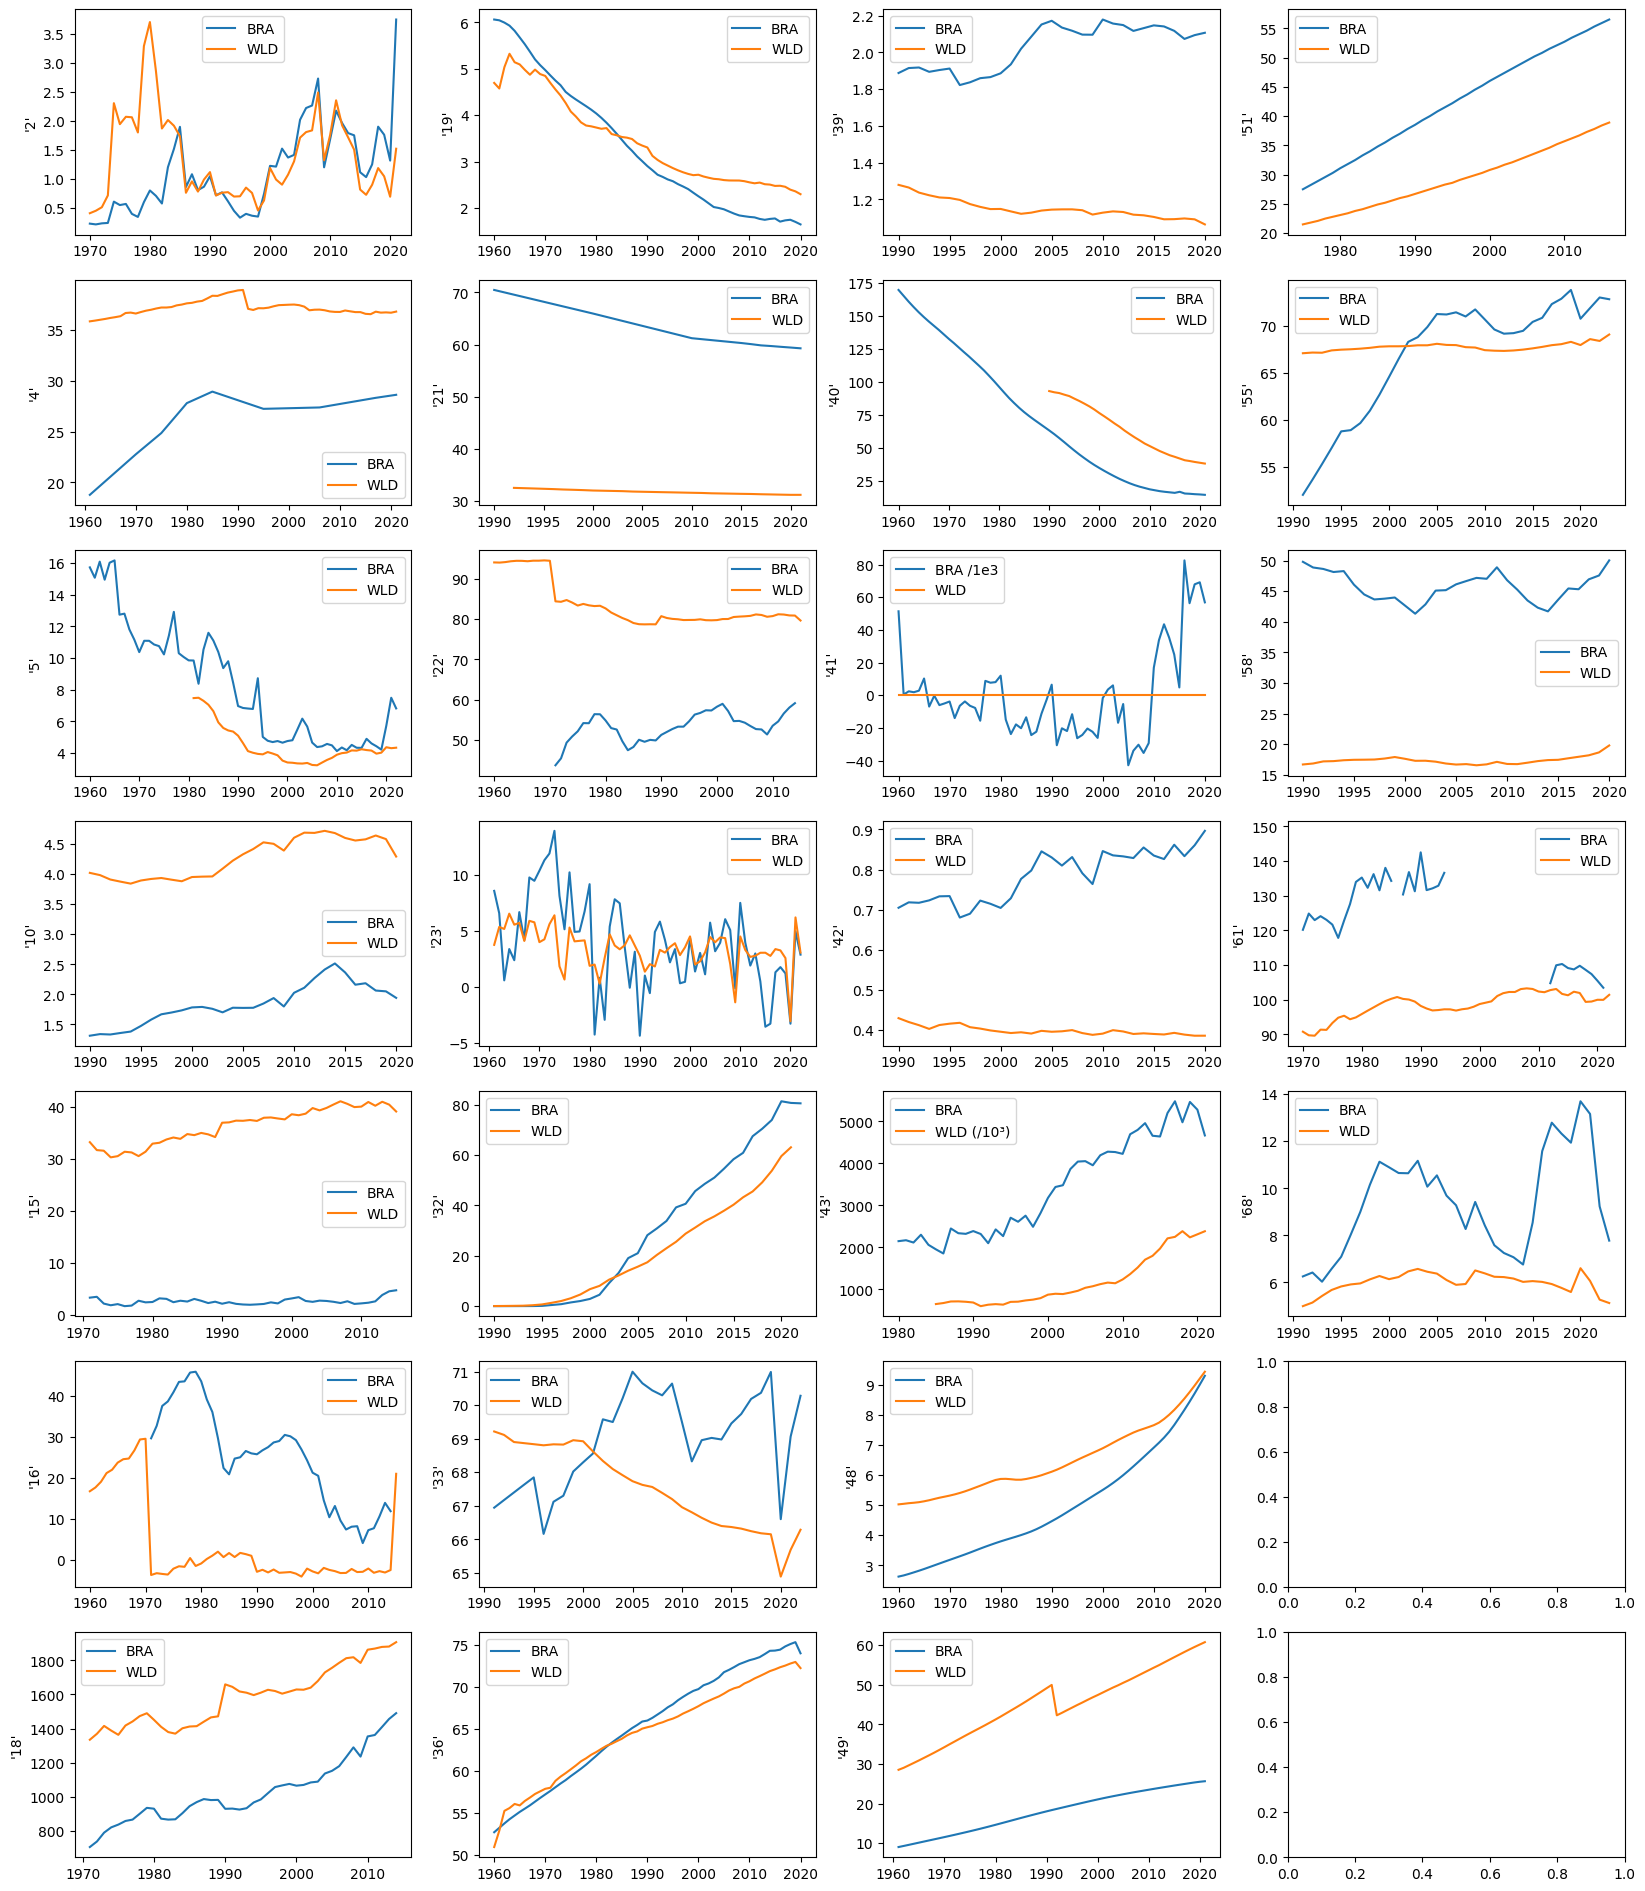

In [ ]:
figure, axs = plt.subplots(7,4, figsize=(20,24))

axs[0,0].plot(bra.index,bra[2], label='BRA')
axs[0,0].plot(wld.index,wld[2], label='WLD')
axs[0,0].legend()
axs[0,0].set_ylabel("'2'")

axs[1,0].plot(bra.index,bra[4], label='BRA')
axs[1,0].plot(wld.index,wld[4], label='WLD')
axs[1,0].legend()
axs[1,0].set_ylabel("'4'")

axs[2,0].plot(bra.index,bra[5], label='BRA')
axs[2,0].plot(wld.index,wld[5], label='WLD')
axs[2,0].legend()
axs[2,0].set_ylabel("'5'")

axs[3,0].plot(bra.index,bra[10], label='BRA')
axs[3,0].plot(wld.index,wld[10], label='WLD')
axs[3,0].legend()
axs[3,0].set_ylabel("'10'")

axs[4,0].plot(bra.index,bra[15], label='BRA')
axs[4,0].plot(wld.index,wld[15], label='WLD')
axs[4,0].legend()
axs[4,0].set_ylabel("'15'")

axs[5,0].plot(bra.index,bra[16], label='BRA')
axs[5,0].plot(wld.index,wld[16], label='WLD')
axs[5,0].legend()
axs[5,0].set_ylabel("'16'")

axs[6,0].plot(bra.index,bra[18], label='BRA')
axs[6,0].plot(wld.index,wld[18], label='WLD')
axs[6,0].legend()
axs[6,0].set_ylabel("'18'")

axs[0,1].plot(bra.index,bra[19], label='BRA')
axs[0,1].plot(wld.index,wld[19], label='WLD')
axs[0,1].legend()
axs[0,1].set_ylabel("'19'")

axs[1,1].plot(bra.index,bra[21], label='BRA')
axs[1,1].plot(wld.index,wld[21], label='WLD')
axs[1,1].legend()
axs[1,1].set_ylabel("'21'")

axs[2,1].plot(bra.index,bra[22], label='BRA')
axs[2,1].plot(wld.index,wld[22], label='WLD')
axs[2,1].legend()
axs[2,1].set_ylabel("'22'")

axs[3,1].plot(bra.index,bra[23], label='BRA')
axs[3,1].plot(wld.index,wld[23], label='WLD')
axs[3,1].legend()
axs[3,1].set_ylabel("'23'")

axs[4,1].plot(bra.index, bra[32], label='BRA')
axs[4,1].plot(wld.index, wld[32], label='WLD')
axs[4,1].legend()
axs[4,1].set_ylabel("'32'")

axs[5,1].plot(bra.index, bra[33], label='BRA')
axs[5,1].plot(wld.index, wld[33], label='WLD')
axs[5,1].legend()
axs[5,1].set_ylabel("'33'")

axs[6,1].plot(bra.index, bra[36], label='BRA')
axs[6,1].plot(wld.index, wld[36], label='WLD')
axs[6,1].legend()
axs[6,1].set_ylabel("'36'")

axs[0,2].plot(bra.index, bra[39], label='BRA')
axs[0,2].plot(wld.index, wld[39], label='WLD')
axs[0,2].legend()
axs[0,2].set_ylabel("'39'")

axs[1,2].plot(bra.index, bra[40], label='BRA')
axs[1,2].plot(wld.index, wld[40], label='WLD')
axs[1,2].legend()
axs[1,2].set_ylabel("'40'")

axs[2,2].plot(bra.index, bra[41]/1e3, label='BRA /1e3')
axs[2,2].plot(wld.index, wld[41], label='WLD')
axs[2,2].legend()
axs[2,2].set_ylabel("'41'")

axs[3,2].plot(bra.index, bra[42], label='BRA')
axs[3,2].plot(wld.index, wld[42], label='WLD')
axs[3,2].legend()
axs[3,2].set_ylabel("'42'")

axs[4,2].plot(bra.index, bra[43], label='BRA')
axs[4,2].plot(wld.index, wld[43]/1e3, label='WLD (/10³)')
axs[4,2].legend()
axs[4,2].set_ylabel("'43'")

axs[5,2].plot(bra.index, bra[48], label='BRA')
axs[5,2].plot(wld.index, wld[48], label='WLD')
axs[5,2].legend()
axs[5,2].set_ylabel("'48'")

axs[6,2].plot(bra.index, bra[49], label='BRA')
axs[6,2].plot(wld.index, wld[49], label='WLD')
axs[6,2].legend()
axs[6,2].set_ylabel("'49'")

axs[0,3].plot(bra.index, bra[51], label='BRA')
axs[0,3].plot(wld.index, wld[51], label='WLD')
axs[0,3].legend()
axs[0,3].set_ylabel("'51'")

axs[1,3].plot(bra.index, bra[55], label='BRA')
axs[1,3].plot(wld.index, wld[55], label='WLD')
axs[1,3].legend()
axs[1,3].set_ylabel("'55'")

axs[2,3].plot(bra.index, bra[58], label='BRA')
axs[2,3].plot(wld.index, wld[58], label='WLD')
axs[2,3].legend()
axs[2,3].set_ylabel("'58'")

axs[3,3].plot(bra.index, bra[61], label='BRA')
axs[3,3].plot(wld.index, wld[61], label='WLD')
axs[3,3].legend()
axs[3,3].set_ylabel("'61'")

axs[4,3].plot(bra.index, bra[68], label='BRA')
axs[4,3].plot(wld.index, wld[68], label='WLD')
axs[4,3].legend()
axs[4,3].set_ylabel("'68'")

figure.savefig('plot.png', dpi=500)

## **Descriptive Statistics**

In [ ]:
# copy the data
bra_max_scaled = bra.copy()

# apply normalization techniques
for column in bra_max_scaled.columns:
    bra_max_scaled[column] = bra_max_scaled[column]  / bra_max_scaled[column].abs().max()

# view normalized data
display(bra_max_scaled)

,2,4,5,10,15,16,18,19,21,22,...,41,42,43,48,49,51,55,58,61,68
1960,NaN,NaN,0.972754,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,0.622371,NaN,NaN,0.282917,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.648594,0.932265,NaN,NaN,NaN,NaN,0.997195,NaN,NaN,...,0.004468,NaN,NaN,0.287072,0.351474,NaN,NaN,NaN,NaN,NaN
1962,NaN,0.663913,0.995212,NaN,NaN,NaN,NaN,0.989111,NaN,NaN,...,0.028854,NaN,NaN,0.292321,0.362061,NaN,NaN,NaN,NaN,NaN
1963,NaN,0.679231,0.924545,NaN,NaN,NaN,NaN,0.978221,NaN,NaN,...,0.022243,NaN,NaN,0.298009,0.372869,NaN,NaN,NaN,NaN,NaN
1964,NaN,0.694549,0.990891,NaN,NaN,NaN,NaN,0.959908,NaN,NaN,...,0.033745,NaN,NaN,0.303863,0.383820,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.469678,0.983991,0.260001,0.815548,NaN,NaN,NaN,0.280977,0.845305,NaN,...,0.837714,0.959943,0.997080,0.968211,0.988133,NaN,1.000000,0.950649,0.722247,0.871533
2020,0.350746,0.986563,0.353148,0.772500,NaN,NaN,NaN,0.272067,0.843303,NaN,...,0.688712,1.000000,0.963504,1.000000,0.994728,NaN,0.958626,1.000000,0.709408,1.000000
2021,1.000000,0.989136,0.462926,NaN,NaN,NaN,NaN,NaN,0.841218,NaN,...,NaN,NaN,0.851460,NaN,1.000000,NaN,0.973975,NaN,0.695781,0.960584
2022,NaN,NaN,0.421267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.989191,NaN,NaN,0.673723


In [ ]:
desc_stat_bra = bra_max_scaled.describe().T

In [ ]:
desc_stat_bra

,count,mean,std,min,25%,50%,75%,max
2,52.0,0.300999,0.196792,0.056956,0.152631,0.276545,0.416357,1.0
4,61.0,0.909043,0.096724,0.648594,0.879261,0.946084,0.970666,1.0
5,63.0,0.514438,0.228872,0.254482,0.291692,0.462926,0.678411,1.0
10,31.0,0.730559,0.130324,0.522205,0.669716,0.709260,0.818230,1.0
15,45.0,0.552031,0.136906,0.352798,0.457694,0.528491,0.578342,1.0
16,44.0,0.544388,0.262070,0.089441,0.298972,0.572414,0.676284,1.0
18,44.0,0.690485,0.127001,0.474052,0.606476,0.658918,0.738984,1.0
19,61.0,0.547242,0.236272,0.272067,0.325689,0.479294,0.728428,1.0
21,32.0,0.906851,0.051572,0.841218,0.860214,0.898898,0.950242,1.0
22,44.0,0.900242,0.059621,0.738558,0.864773,0.902504,0.952286,1.0


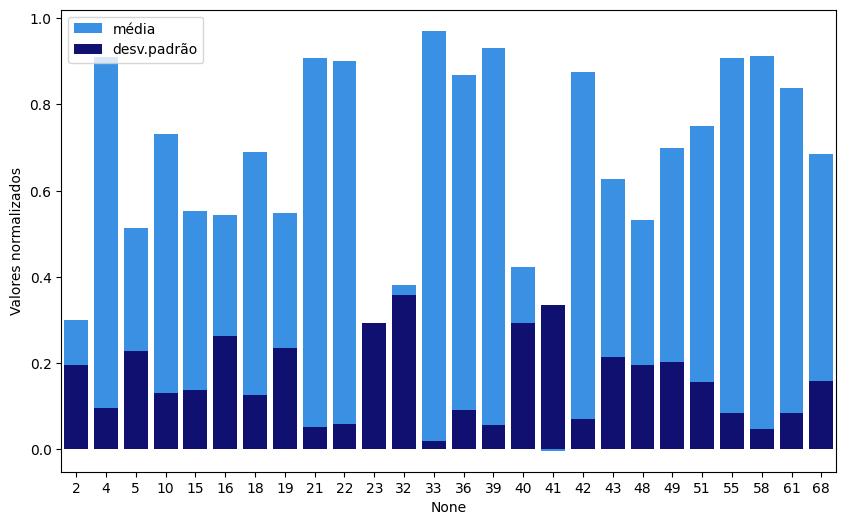

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(desc_stat_bra, x=desc_stat_bra.index, y="mean", label='média', color='dodgerblue').set_ylabel('Valores normalizados')
sns.barplot(desc_stat_bra, x=desc_stat_bra.index, y="std", label='desv.padrão', color='navy')
plt.legend()
fig.savefig('mean-std.png')

In [ ]:
# copy the data
wld_max_scaled = wld.copy()

# apply normalization techniques
for column in wld_max_scaled.columns:
    wld_max_scaled[column] = wld_max_scaled[column]  / wld_max_scaled[column].abs().max()

# view normalized data
display(wld_max_scaled)

,2,4,5,10,15,16,18,19,21,22,...,41,42,43,48,49,51,55,58,61,68
1960,NaN,NaN,NaN,NaN,NaN,0.566649,NaN,0.882111,NaN,0.994680,...,NaN,NaN,NaN,0.533127,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.920613,NaN,NaN,NaN,0.597823,NaN,0.859519,NaN,0.994270,...,NaN,NaN,NaN,0.535031,0.469340,NaN,NaN,NaN,NaN,NaN
1962,NaN,0.922490,NaN,NaN,NaN,0.644835,NaN,0.945852,NaN,0.995558,...,NaN,NaN,NaN,0.537242,0.477655,NaN,NaN,NaN,NaN,NaN
1963,NaN,0.924617,NaN,NaN,NaN,0.716625,NaN,1.000000,NaN,0.997740,...,NaN,NaN,NaN,0.538774,0.487825,NaN,NaN,NaN,NaN,NaN
1964,NaN,0.926713,NaN,NaN,NaN,0.744457,NaN,0.965810,NaN,0.998937,...,NaN,NaN,NaN,0.540800,0.498062,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.281483,0.943278,0.536245,0.970953,NaN,NaN,NaN,0.443438,0.960098,NaN,...,NaN,0.898169,0.938356,0.975755,0.980174,NaN,0.988739,0.942604,0.963219,0.846783
2020,0.186446,0.942464,0.582055,0.909443,NaN,NaN,NaN,0.431990,0.958964,NaN,...,NaN,0.898301,0.968654,1.000000,0.990134,NaN,0.983819,1.000000,0.968144,1.000000
2021,0.410036,0.945306,0.574002,NaN,NaN,NaN,NaN,NaN,0.958969,NaN,...,NaN,NaN,0.999539,NaN,1.000000,NaN,0.992938,NaN,0.967941,0.918348
2022,NaN,NaN,0.578012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.990106,NaN,0.981933,0.797706


In [ ]:
desc_stat_wld = wld_max_scaled.describe().T
desc_stat_wld

,count,mean,std,min,25%,50%,75%,max
2,52.0,0.370044,0.201376,0.109683,0.205172,0.310521,0.497614,1.0
4,61.0,0.954208,0.018342,0.920613,0.943956,0.950047,0.962109,1.0
5,42.0,0.594123,0.160373,0.429700,0.497727,0.539340,0.608227,1.0
10,31.0,0.903304,0.068305,0.814046,0.835540,0.909443,0.970509,1.0
15,45.0,0.884908,0.083386,0.737386,0.821101,0.908605,0.957281,1.0
16,56.0,0.117881,0.358089,-0.137685,-0.100995,-0.071352,0.057151,1.0
18,44.0,0.831939,0.090262,0.700244,0.743615,0.844764,0.887243,1.0
19,61.0,0.646887,0.173851,0.431990,0.489000,0.620923,0.766405,1.0
21,30.0,0.976772,0.012601,0.958964,0.966208,0.975284,0.986219,1.0
22,56.0,0.883699,0.059074,0.831794,0.845132,0.855122,0.889665,1.0


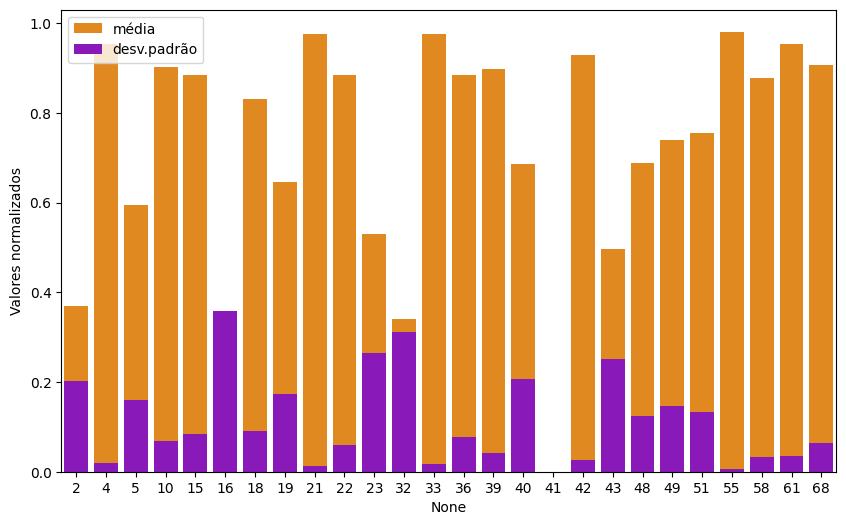

In [ ]:
fig2, axs = plt.subplots(figsize=(10,6))
sns.barplot(desc_stat_wld, x=desc_stat_wld.index, y="mean", label='média', color='darkorange').set_ylabel('Valores normalizados')
sns.barplot(desc_stat_wld, x=desc_stat_wld.index, y="std", label='desv.padrão', color='darkviolet')
legend = plt.legend()
fig2.savefig('mean-std-wld.png')

In [ ]:
mean = bra_max_scaled.mean()
mdn = bra_max_scaled.median()
mode = bra_max_scaled.mode()
std = bra_max_scaled.std()

dst = pd.DataFrame()
dst['mean'] = mean
dst['median'] = mdn
dst['std'] = std

In [ ]:
dst

,mean,median,std
2,0.300999,0.276545,0.196792
4,0.909043,0.946084,0.096724
5,0.514438,0.462926,0.228872
10,0.730559,0.709260,0.130324
15,0.552031,0.528491,0.136906
16,0.544388,0.572414,0.262070
18,0.690485,0.658918,0.127001
19,0.547242,0.479294,0.236272
21,0.906851,0.898898,0.051572
22,0.900242,0.902504,0.059621


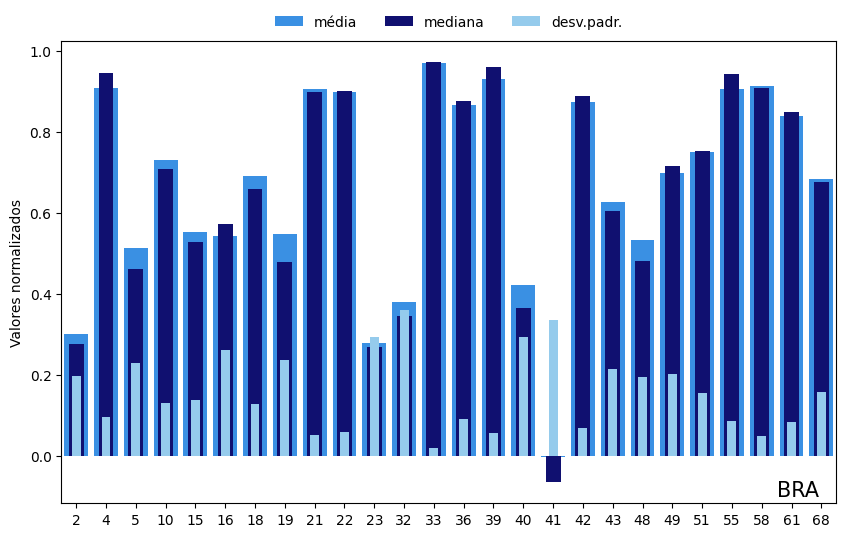

In [ ]:
barfig, axb = plt.subplots(figsize=(10,6))

sns.barplot(dst['mean'], label='média', color='dodgerblue')
sns.barplot(dst['median'], width=0.5,label='mediana', color='navy')
sns.barplot(dst['std'], width=0.3, label='desv.padr.', color='lightskyblue').legend()
axb.set_ylabel('Valores normalizados')
sns.move_legend(
    axb, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
axb.text(23.5, -0.1, "BRA",fontsize = 15)

barfig.savefig('bar', dpi=200)

In [ ]:
mean_w = wld_max_scaled.mean()
mdn_w = wld_max_scaled.median()
mode_w = wld_max_scaled.mode()
std_w = wld_max_scaled.std()

dst_w = pd.DataFrame()
dst_w['mean'] = mean_w
dst_w['median'] = mdn_w
dst_w['std'] = std_w

In [ ]:
dst_w

,mean,median,std
2,0.370044,0.310521,0.201376
4,0.954208,0.950047,0.018342
5,0.594123,0.539340,0.160373
10,0.903304,0.909443,0.068305
15,0.884908,0.908605,0.083386
16,0.117881,-0.071352,0.358089
18,0.831939,0.844764,0.090262
19,0.646887,0.620923,0.173851
21,0.976772,0.975284,0.012601
22,0.883699,0.855122,0.059074


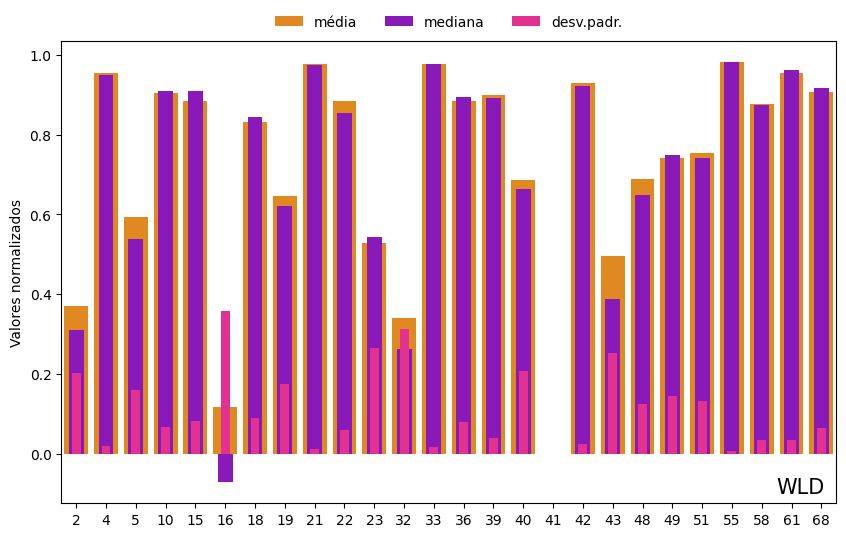

In [ ]:
barfig_w, axbw = plt.subplots(figsize=(10,6))

sns.barplot(dst_w['mean'], label='média', color='darkorange')
sns.barplot(dst_w['median'], width=0.5,label='mediana', color='darkviolet')
sns.barplot(dst_w['std'], width=0.3, label='desv.padr.', color='deeppink').legend()
axbw.set_ylabel('Valores normalizados')
axbw.text(23.5, -0.1, "WLD",fontsize = 15)
sns.move_legend(
    axbw, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

barfig_w.savefig('barw.png', dpi=200)

In [ ]:
#sns.pairplot(bra_max_scaled)

## **Correlations**

In [ ]:
corr = bra_max_scaled.corr()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

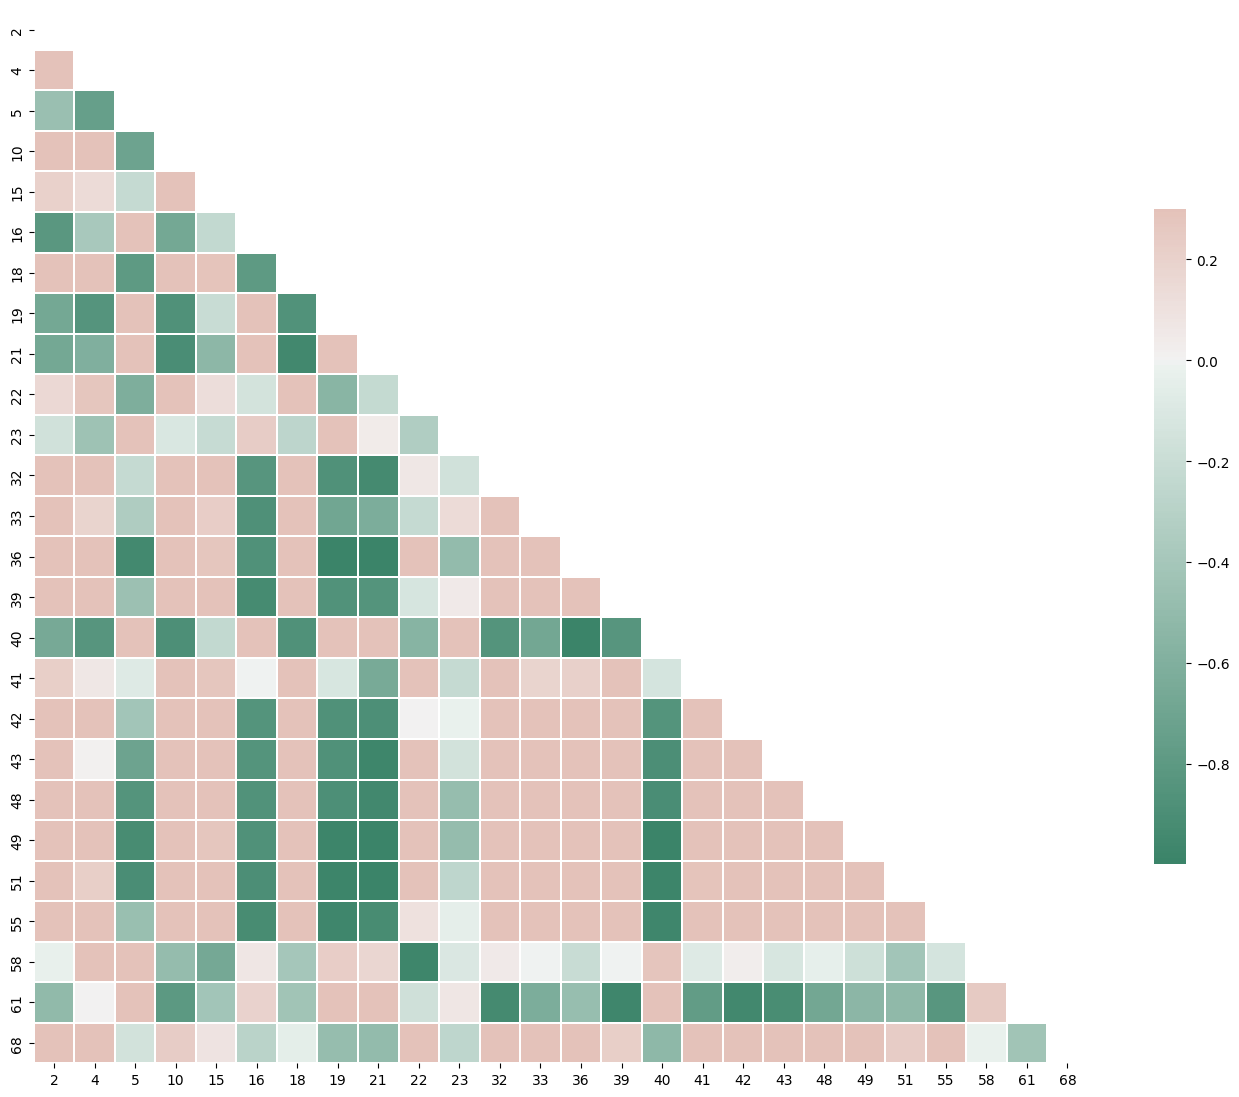

In [ ]:
f, ax = plt.subplots(figsize=(17, 17))
cmap = sns.diverging_palette(155, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.3, cbar_kws={"shrink": 0.5})
f.savefig('corr.png',dpi=200)

In [ ]:
corr

,2,4,5,10,15,16,18,19,21,22,...,41,42,43,48,49,51,55,58,61,68
2,1.000000,0.495999,-0.461143,0.563042,0.204648,-0.817085,0.750707,-0.672495,-0.668930,0.162330,...,0.216413,0.682617,0.593742,0.646877,0.684265,0.607904,0.712077,-0.033564,-0.513386,0.303521
4,0.495999,1.000000,-0.752807,0.498726,0.139502,-0.386590,0.452056,-0.844132,-0.604641,0.271779,...,0.065830,0.601683,0.015502,0.635788,0.781273,0.223633,0.429957,0.302539,0.003274,0.349993
5,-0.461143,-0.752807,1.000000,-0.711438,-0.221090,0.737316,-0.798694,0.955869,0.525099,-0.619895,...,-0.080196,-0.415478,-0.713150,-0.847511,-0.925005,-0.903616,-0.466488,0.487896,0.384623,-0.151084
10,0.563042,0.498726,-0.711438,1.000000,0.740380,-0.671445,0.965772,-0.879673,-0.902330,0.511923,...,0.623746,0.751259,0.864562,0.826036,0.894094,0.936172,0.766904,-0.490588,-0.807026,0.234151
15,0.204648,0.139502,-0.221090,0.740380,1.000000,-0.241648,0.291903,-0.205733,-0.534133,0.130405,...,0.276764,0.416667,0.375814,0.382465,0.276930,0.395879,0.395648,-0.664706,-0.416744,0.091130
16,-0.817085,-0.386590,0.737316,-0.671445,-0.241648,1.000000,-0.797862,0.854101,0.890971,-0.144094,...,-0.003375,-0.849582,-0.853473,-0.867754,-0.871094,-0.899660,-0.923982,0.069654,0.198323,-0.286088
18,0.750707,0.452056,-0.798694,0.965772,0.291903,-0.797862,1.000000,-0.867613,-0.953918,0.559357,...,0.353570,0.810617,0.939186,0.969230,0.913662,0.911715,0.774708,-0.403864,-0.423851,-0.050740
19,-0.672495,-0.844132,0.955869,-0.879673,-0.205733,0.854101,-0.867613,1.000000,0.985997,-0.553370,...,-0.124214,-0.876963,-0.872968,-0.890783,-0.985893,-0.979649,-0.964613,0.227633,0.384447,-0.489288
21,-0.668930,-0.604641,0.525099,-0.902330,-0.534133,0.890971,-0.953918,0.985997,1.000000,-0.227982,...,-0.651824,-0.887753,-0.973508,-0.948226,-0.995823,-0.997251,-0.922976,0.176922,0.907706,-0.500674
22,0.162330,0.271779,-0.619895,0.511923,0.130405,-0.144094,0.559357,-0.553370,-0.227982,1.000000,...,0.325458,0.001793,0.493796,0.549149,0.563360,0.414739,0.098984,-0.972785,-0.168635,0.298328


In [ ]:
corr_wld = wld_max_scaled.corr()

In [ ]:
mask_wld = np.triu(np.ones_like(corr, dtype=bool))

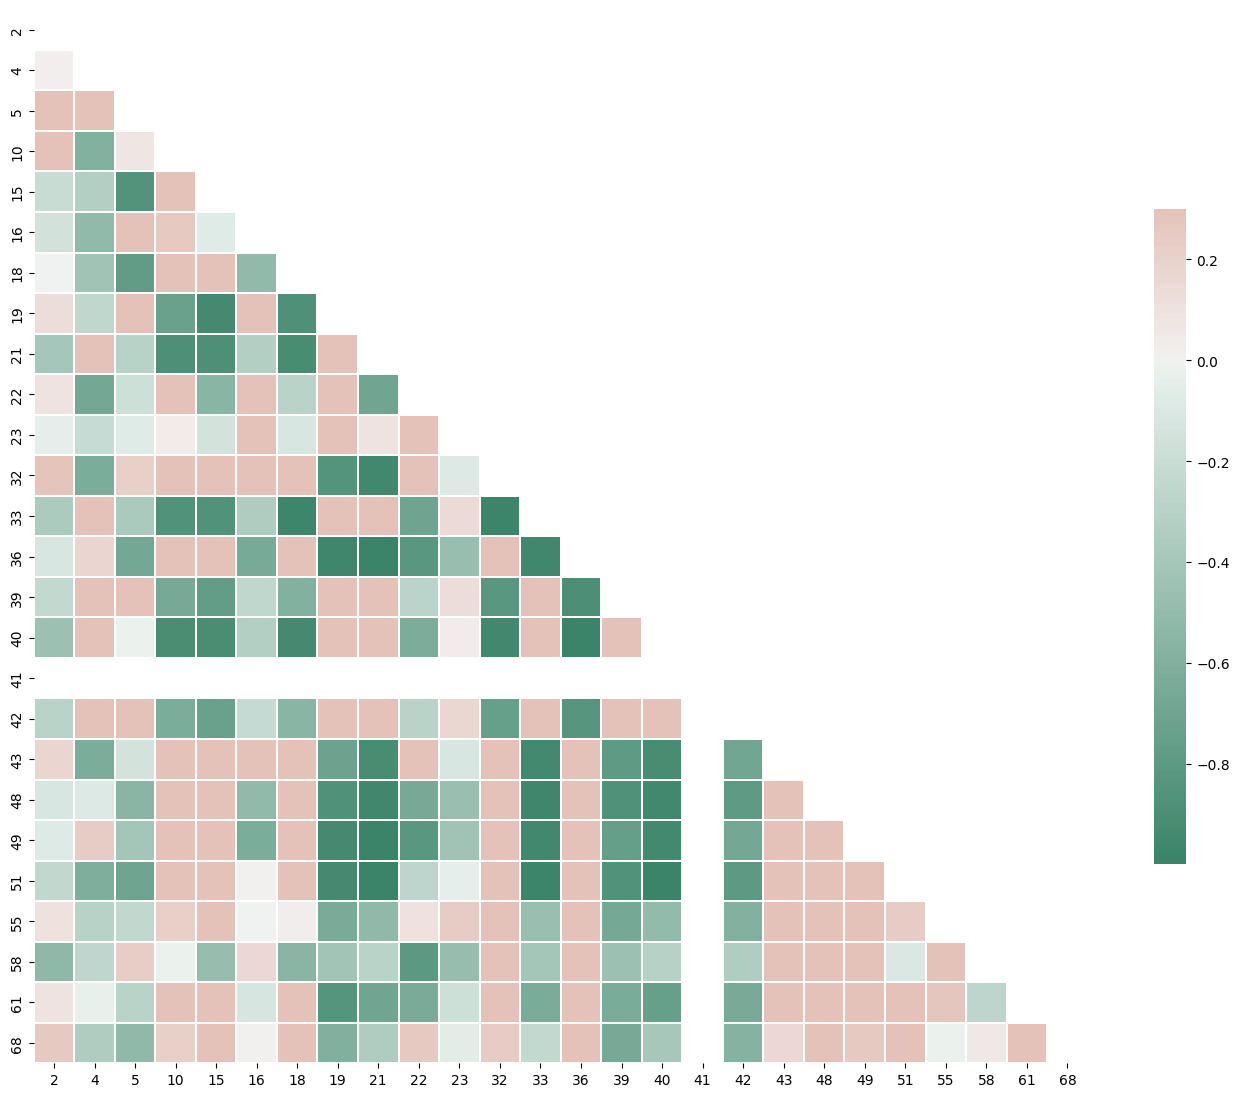

In [ ]:
f_w, axw = plt.subplots(figsize=(17, 17))
cmap = sns.diverging_palette(155, 20, as_cmap=True)
sns.heatmap(corr_wld, mask=mask_wld, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.3, cbar_kws={"shrink": 0.5})
f_w.savefig('corr_wld.png',dpi=200)

In [ ]:
corr_wld

,2,4,5,10,15,16,18,19,21,22,...,41,42,43,48,49,51,55,58,61,68
2,1.000000,0.018792,0.326323,0.649830,-0.211319,-0.155811,-0.004977,0.123278,-0.402352,0.084425,...,NaN,-0.290419,0.180143,-0.122522,-0.084150,-0.243306,0.104932,-0.523995,0.086467,0.264350
4,0.018792,1.000000,0.580699,-0.588330,-0.318599,-0.510191,-0.430374,-0.256563,0.724221,-0.668606,...,NaN,0.724587,-0.629534,-0.086752,0.229708,-0.614891,-0.300751,-0.266707,-0.028343,-0.345352
5,0.326323,0.580699,1.000000,0.077703,-0.859044,0.330785,-0.769063,0.866441,-0.297930,-0.181211,...,NaN,0.417119,-0.149358,-0.548732,-0.412363,-0.701822,-0.242672,0.227915,-0.292358,-0.519651
10,0.649830,-0.588330,0.077703,1.000000,0.887999,0.255995,0.996777,-0.724637,-0.887260,0.782314,...,NaN,-0.623677,0.785215,0.793971,0.870118,0.918937,0.214301,-0.014482,0.834248,0.218006
15,-0.211319,-0.318599,-0.859044,0.887999,1.000000,-0.075154,0.913864,-0.933869,-0.886705,-0.554119,...,NaN,-0.730096,0.700779,0.910525,0.875085,0.938721,0.352598,-0.481270,0.803921,0.543935
16,-0.155811,-0.510191,0.330785,0.255995,-0.075154,1.000000,-0.506493,0.719164,-0.328029,0.877138,...,NaN,-0.217074,0.375901,-0.514123,-0.625521,0.013891,-0.002994,0.154282,-0.130912,0.009901
18,-0.004977,-0.430374,-0.769063,0.996777,0.913864,-0.506493,1.000000,-0.881034,-0.923246,-0.297111,...,NaN,-0.552562,0.850133,0.960622,0.876057,0.954085,0.025560,-0.546811,0.732912,0.350904
19,0.123278,-0.256563,0.866441,-0.724637,-0.933869,0.719164,-0.881034,1.000000,0.976407,0.855851,...,NaN,0.904982,-0.716438,-0.875196,-0.934874,-0.939917,-0.645853,-0.428130,-0.841949,-0.592311
21,-0.402352,0.724221,-0.297930,-0.887260,-0.886705,-0.328029,-0.923246,0.976407,1.000000,-0.697868,...,NaN,0.838600,-0.919906,-0.958010,-0.993341,-0.987411,-0.518967,-0.295434,-0.695978,-0.344093
22,0.084425,-0.668606,-0.181211,0.782314,-0.554119,0.877138,-0.297111,0.855851,-0.697868,1.000000,...,NaN,-0.286645,0.544272,-0.653473,-0.814790,-0.271021,0.099387,-0.801389,-0.642608,0.258309


## **Dataset Quality Metics**

Dataset imbalance
$$
D = \frac{∑_1^N (x_i - \bar{x})}{N}
$$

Where, $x_{i}$ is the number of instances for series "$i$";

N is the total number of instances in the dataset.

In [ ]:
def dim(df):

    Nserie = df.describe().iloc[0]
    N_tot = Nserie.sum()

    xmean = df.describe().iloc[0].mean()

    sum = 0
    for value in Nserie:
        sum = sum + abs(value - xmean)

    metric = (1/N_tot) * sum

    return metric

Dataset validity metrics

$$
V = \frac{∑_1^N A_i}{N}
$$

Where, $A_i$ is the couting of invalid data for serie "$i$".

In [ ]:
def dvm(df):

    dnan = df.isna().sum().sum()
    dvl = df.count().sum()

    return dnan/(dnan + dvl)

In [ ]:
metrics = {'imbalance': [dim(df_brazil), dim(wld), dim(bra_max_scaled), dim(wld_max_scaled)],
           'Validity': [dvm(df_brazil), dvm(wld), dvm(bra_max_scaled), dvm(wld_max_scaled)]}

In [ ]:
df_metr = pd.DataFrame(metrics)

In [ ]:
df_metr

,imbalance,Validity
0,0.474574,0.500217
1,0.255469,0.296274
2,0.248431,0.285457
3,0.289536,0.332933
